# import libraries
!pip install missingno
import pandas as pd  #used for data pre-processing
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns    #used for data visualization
import missingno as msno   #used for missing data visualization
from collections import Counter   #used for counting 

In [2]:
import pandas as pd #used for data pre-processing 
import matplotlib.pyplot as plt #used for data visualization 
import seaborn as sns #used for data visualization 
import missingno as msno #used for missing data visualization 
from collections import Counter #used for counting

In [3]:
#Reading/loading the data
df = pd.read_csv("Dune Sales Data.csv")

In [4]:
#top 5 rows
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [5]:
#last 5 rows
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Data dimension - nos of rows and columns in the data
df.shape

(34867, 12)

In [7]:
#Examing data features(columns)
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
#Investigate data for anomalies and confirming the data types of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
#Numerical Statistical Anaysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [10]:
# Categorical Statistical Anaysis
df.describe(include= ["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [11]:
#Identifying/Investigating missing data
df_missing = df.isnull().sum()
df_missing

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

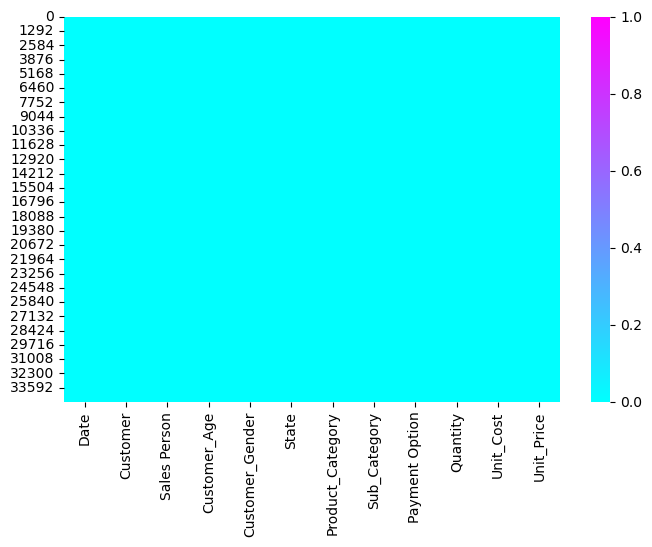

In [12]:
#visualize the missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="cool");

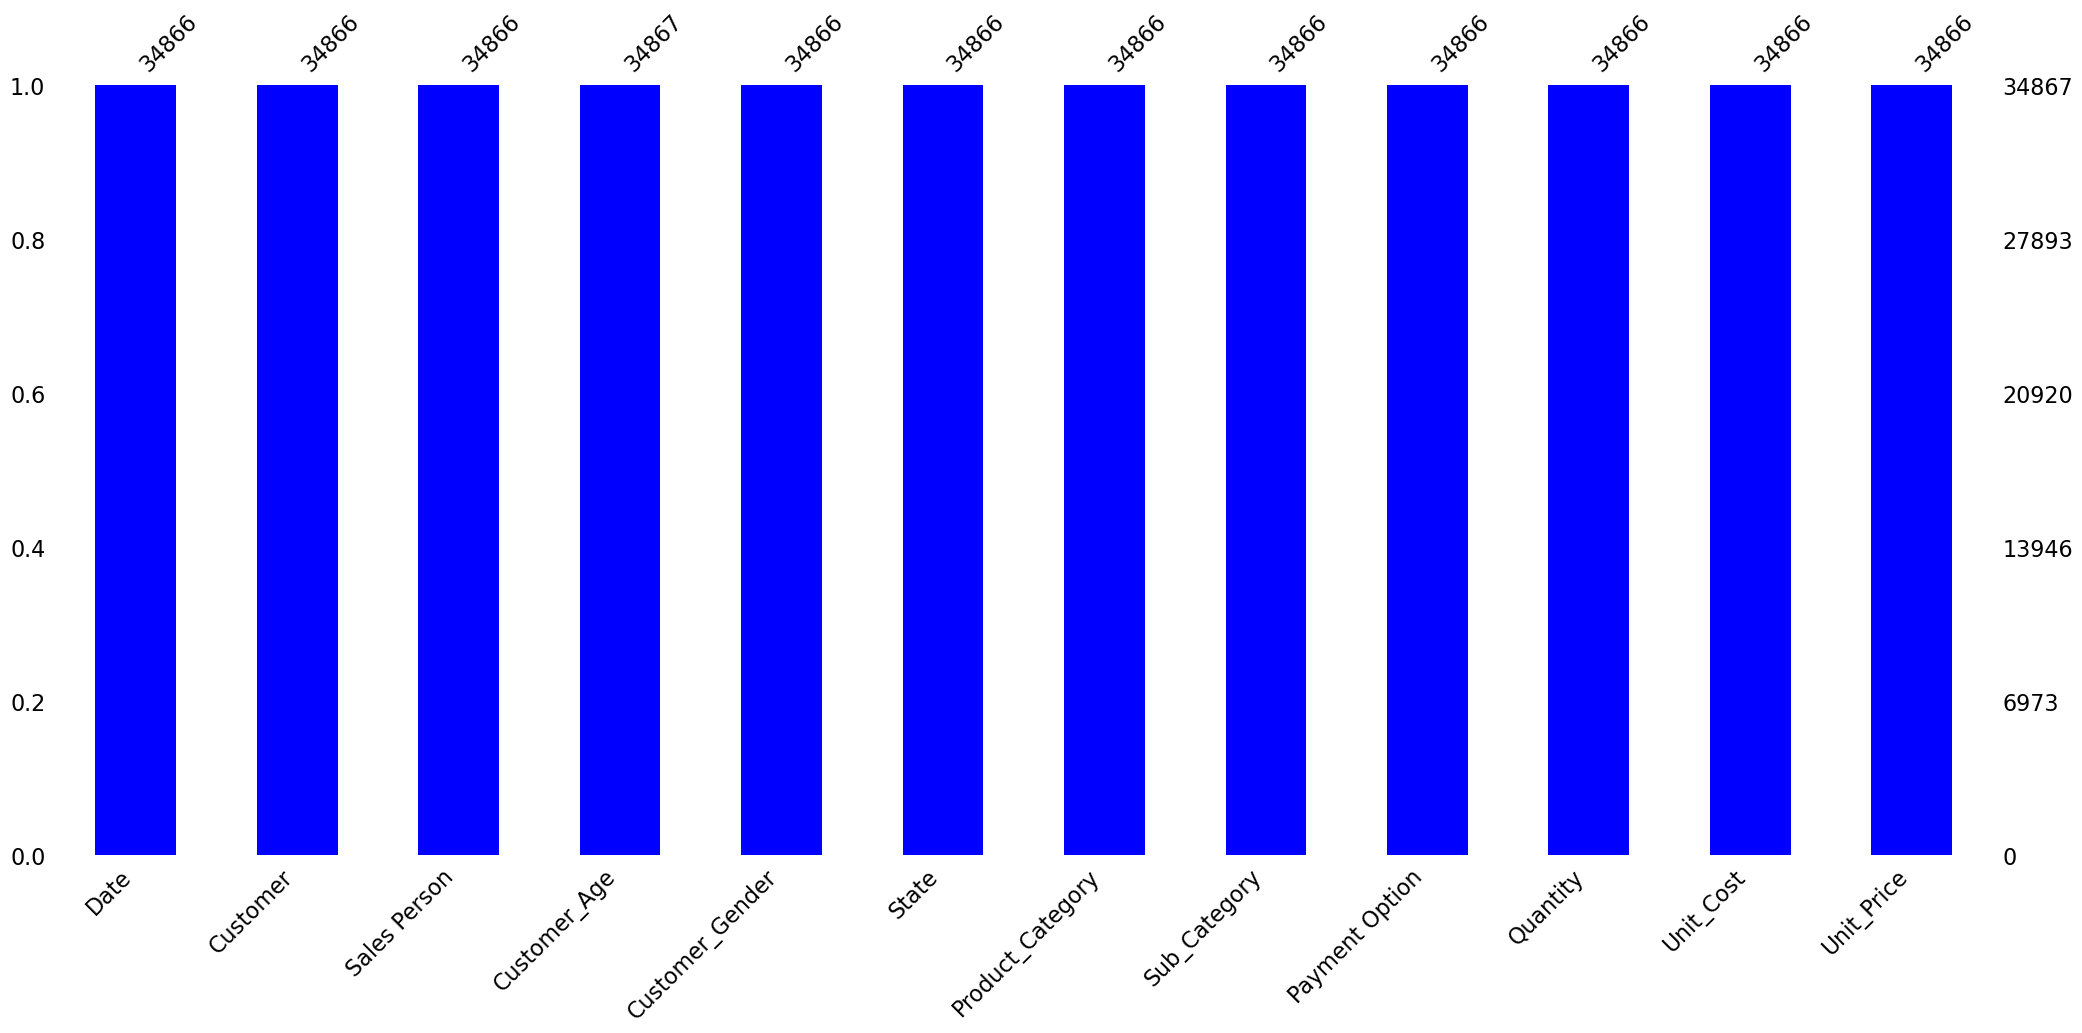

In [13]:
# Another way to visualize missing data
msno.bar(df,color="blue");

In [14]:
# Display missing data locations
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Drop/remove the missing data
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [17]:
#DateTime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [18]:
#Convert the date feature from object to pandas datetime datatype
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_12012\219074540.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [19]:
#Extract Year, Month, Quarter from Date

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_name"] = df["Date"].dt.month_name()
df["Quarter"] = df["Date"].dt.quarter
df["Day"] = df["Date"].dt.day_name()
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_name,Quarter,Day
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,Friday
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,Saturday
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,Saturday
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,Saturday
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,Saturday


In [20]:
#group customer age
# create an age function

def age_group(x):
    if x <=25:
        return "0-25 Young Adults"
    elif x <=40:
        return "26-40 Adults"
    elif x <=50:
        return "41-50 Older Adults"
    else:
        return "Above 50 Elders"
    
#Apply function to data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head()     

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_name,Quarter,Day,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,Friday,26-40 Adults
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,Saturday,26-40 Adults
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,Saturday,26-40 Adults
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,Saturday,26-40 Adults
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,Saturday,26-40 Adults


In [21]:
# Cost, Revenue and Profit calculation

df["Cost"] = df["Unit_Cost"] * df["Quantity"]
df["Revenue"] = df["Unit_Price"] * df["Quantity"]
df["Profit"] = df["Revenue"] - df["Cost"]

In [22]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,Friday,26-40 Adults,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,Saturday,26-40 Adults,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,Saturday,26-40 Adults,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,Saturday,26-40 Adults,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,Saturday,26-40 Adults,105.00,125.01,20.01


In [23]:
# Profilt / Loss grouping

def prolos(P):
    if P >0:
        return "Profit"
    else:
        return "Loss"
    
df["Profit_Label"] = df["Profit"].apply(prolos)
df.head()   

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,2,February,1,Friday,26-40 Adults,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,2,February,1,Saturday,26-40 Adults,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,2,February,1,Saturday,26-40 Adults,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,2016,3,March,1,Saturday,26-40 Adults,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,3,March,1,Saturday,26-40 Adults,105.00,125.01,20.01,Profit


# Univariate Analysis

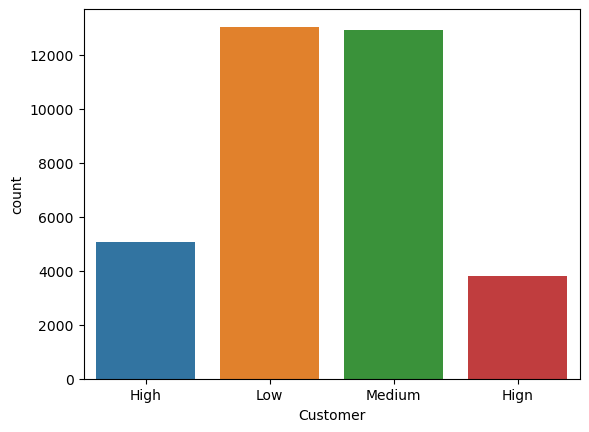

In [24]:
#Count of customers visualizaton

sns.countplot(x="Customer", data=df);


In [25]:
#Investigating affected Columns
df[df["Customer"] == "Hign"]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit,Profit_Label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2015,8,August,3,Monday,26-40 Adults,2295.00,2136.00,-159.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,2015,8,August,3,Tuesday,26-40 Adults,35.00,39.00,4.00,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,2015,8,August,3,Tuesday,26-40 Adults,50.01,56.01,6.00,Profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,2015,8,August,3,Monday,26-40 Adults,60.00,69.00,9.00,Profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,2015,8,August,3,Tuesday,26-40 Adults,125.01,141.00,15.99,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,2016-06-05,Hign,Chinazam,40,F,Lagos,Accessories,Phone Charger,Online,1.0,...,2016,6,June,2,Sunday,26-40 Adults,720.00,905.00,185.00,Profit
33582,2016-06-14,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,1.0,...,2016,6,June,2,Tuesday,26-40 Adults,1150.00,1638.00,488.00,Profit
33583,2016-06-19,Hign,Chinazam,40,M,Abia,Accessories,Phone Charger,Online,3.0,...,2016,6,June,2,Sunday,26-40 Adults,3240.00,4215.99,975.99,Profit
33584,2016-06-19,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,2.0,...,2016,6,June,2,Sunday,26-40 Adults,900.00,1022.00,122.00,Profit


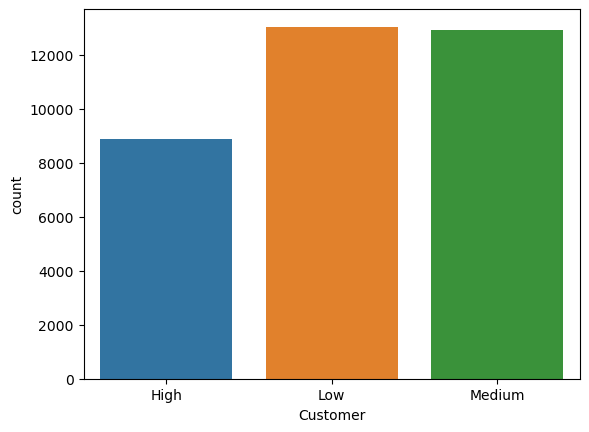

In [26]:
# Correcting the wrong Spelling Hign
df.loc[df["Customer"] =="Hign", "Customer"]="High"
sns.countplot(x="Customer", data=df);

In [27]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

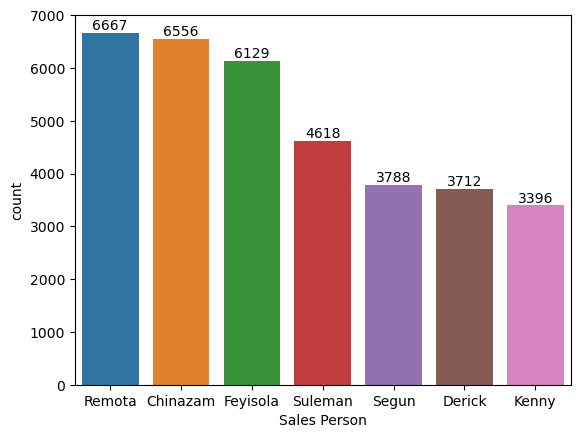

In [28]:
# Transactions by Sales Person
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0], labels=values);

# Remota is the sales person with the highest transaction volume while kenny has the least.

In [29]:
# Total transaction by customer age group
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,2,February,1,Friday,26-40 Adults,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,2,February,1,Saturday,26-40 Adults,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,2,February,1,Saturday,26-40 Adults,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,2016,3,March,1,Saturday,26-40 Adults,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,3,March,1,Saturday,26-40 Adults,105.00,125.01,20.01,Profit


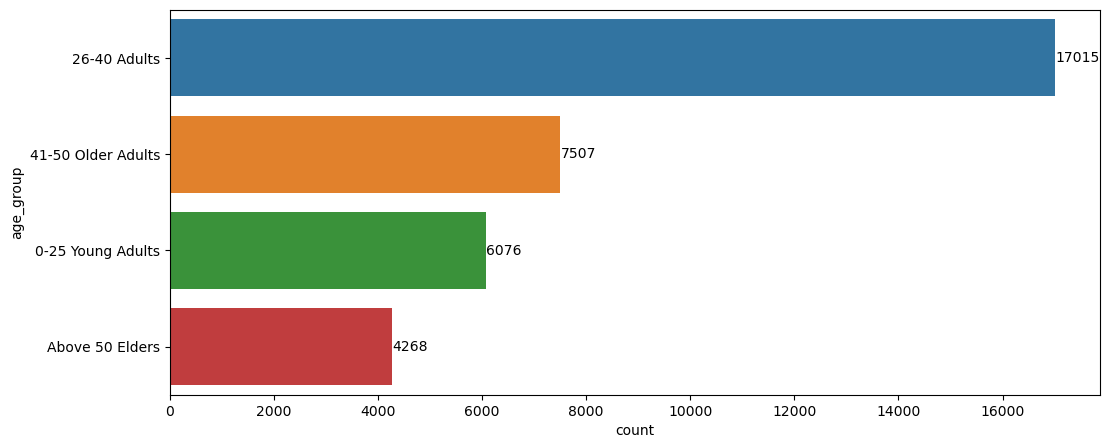

In [30]:
# Total transaction by customer age group
plt.figure(figsize=(12,5))
ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0], labels=values);

# Age group 26-40 Adults carried out the most transaction while the Elders above 50 had the least volume of transactions.

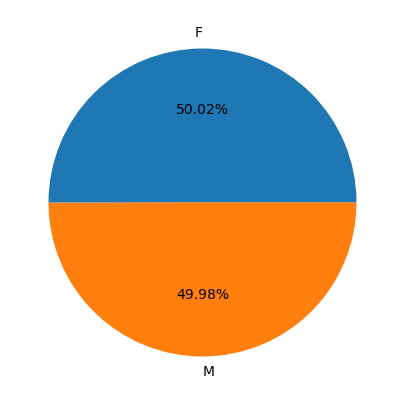

In [31]:
# Total transaction by gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

#Theres no much difference noted between the male and female transactions

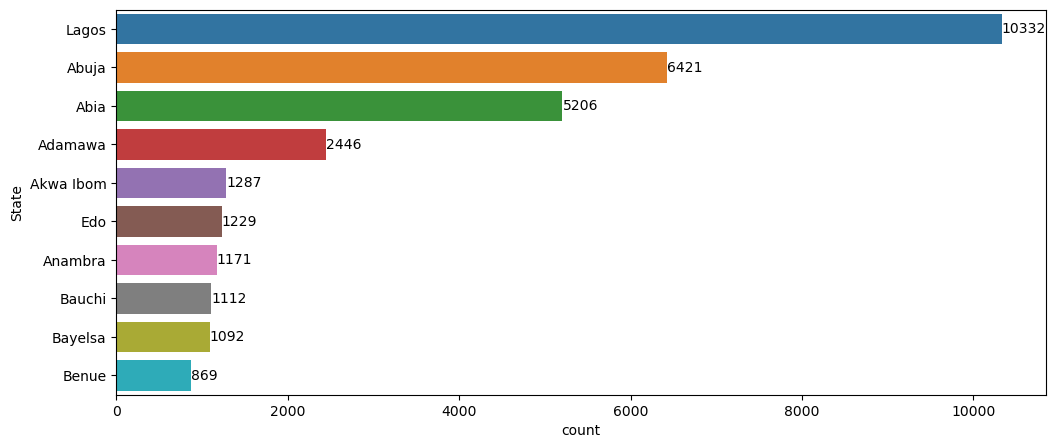

In [32]:
# Top Ten Transactions by State

plt.figure(figsize=(12,5))
topten = df["State"].value_counts().head(10)
ax = sns.countplot(y=df["State"], order=topten.index)
ax.bar_label(container =ax.containers[0], labels=topten);

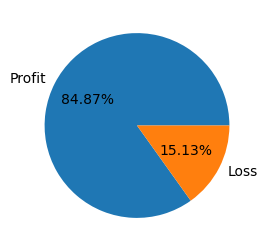

In [33]:
# Transaction by Profit_Label
fig,ax = plt.subplots(figsize=(3,3))
count = Counter(df["Profit_Label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

In [34]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'Month_name',
       'Quarter', 'Day', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_Label'],
      dtype='object')

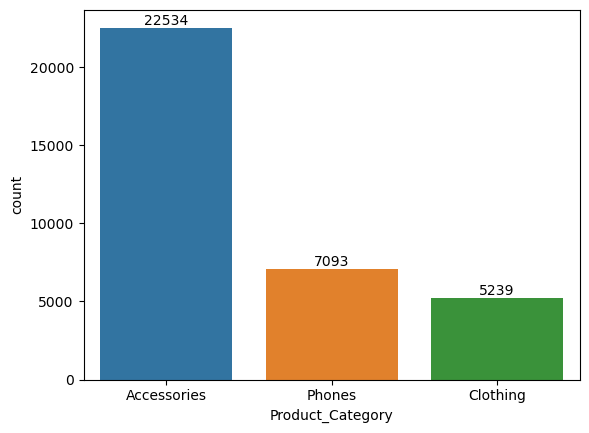

In [35]:
# Transactions by Product_Category
ax = sns.countplot(x=df["Product_Category"], order=df["Product_Category"].value_counts(ascending=False).index)
values = df["Product_Category"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0], labels=values);

#the Accessories category made the most sales as clearly seen in the chart below

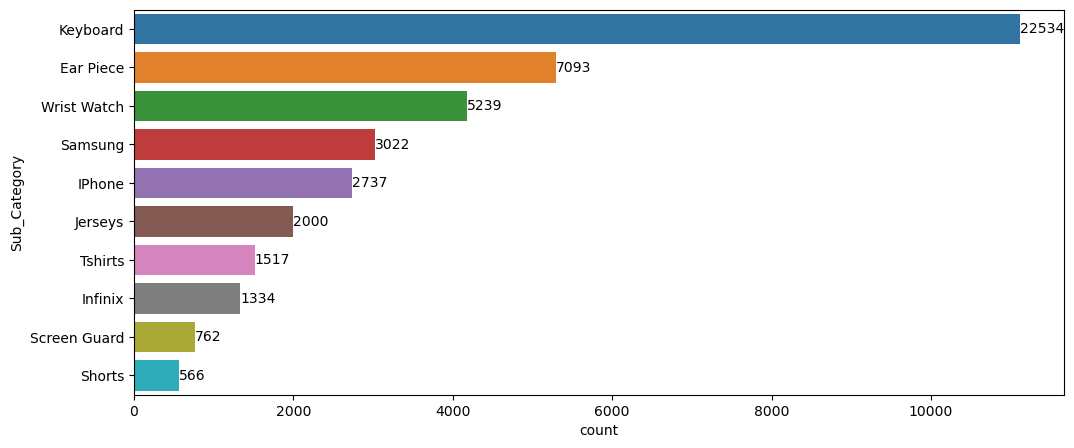

In [36]:
# Transactions by Sub_Category
plt.figure(figsize=(12,5))
top_sub_cat = df["Sub_Category"].value_counts().head(10)
ax = sns.countplot(y=df["Sub_Category"], order=top_sub_cat.index)
ax.bar_label(container =ax.containers[0], labels=values);

#The Keyboard subcategory led in transaction volume

In [37]:
top_payopt = df["Payment Option"].value_counts()
top_payopt

Payment Option
Cash      15911
POS       11013
Online     7942
Name: count, dtype: int64

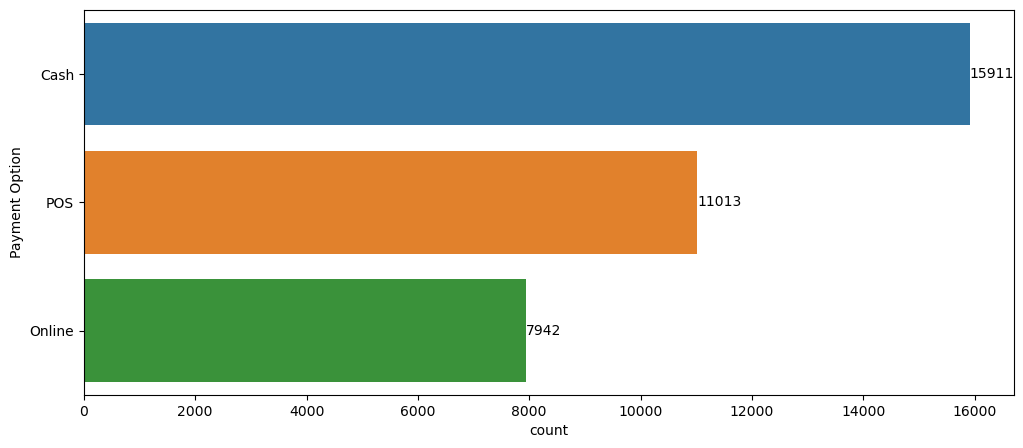

In [38]:
# Transactions by Payment Options
plt.figure(figsize=(12,5))
top_payopt = df["Payment Option"].value_counts()
ax = sns.countplot(y=df["Payment Option"], order=top_payopt.index)
ax.bar_label(container =ax.containers[0], labels=top_payopt);

#its clear that a lot of customers still preferred to pay by cash, closey followed by POS.

# Bivariate Analysis

In [40]:
#fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cust_prof = df.groupby("Customer")["Profit"].sum().reset_index()
cust_prof

,Customer,Profit
0,High,531134.37
1,Low,922094.10
2,Medium,808380.21


''

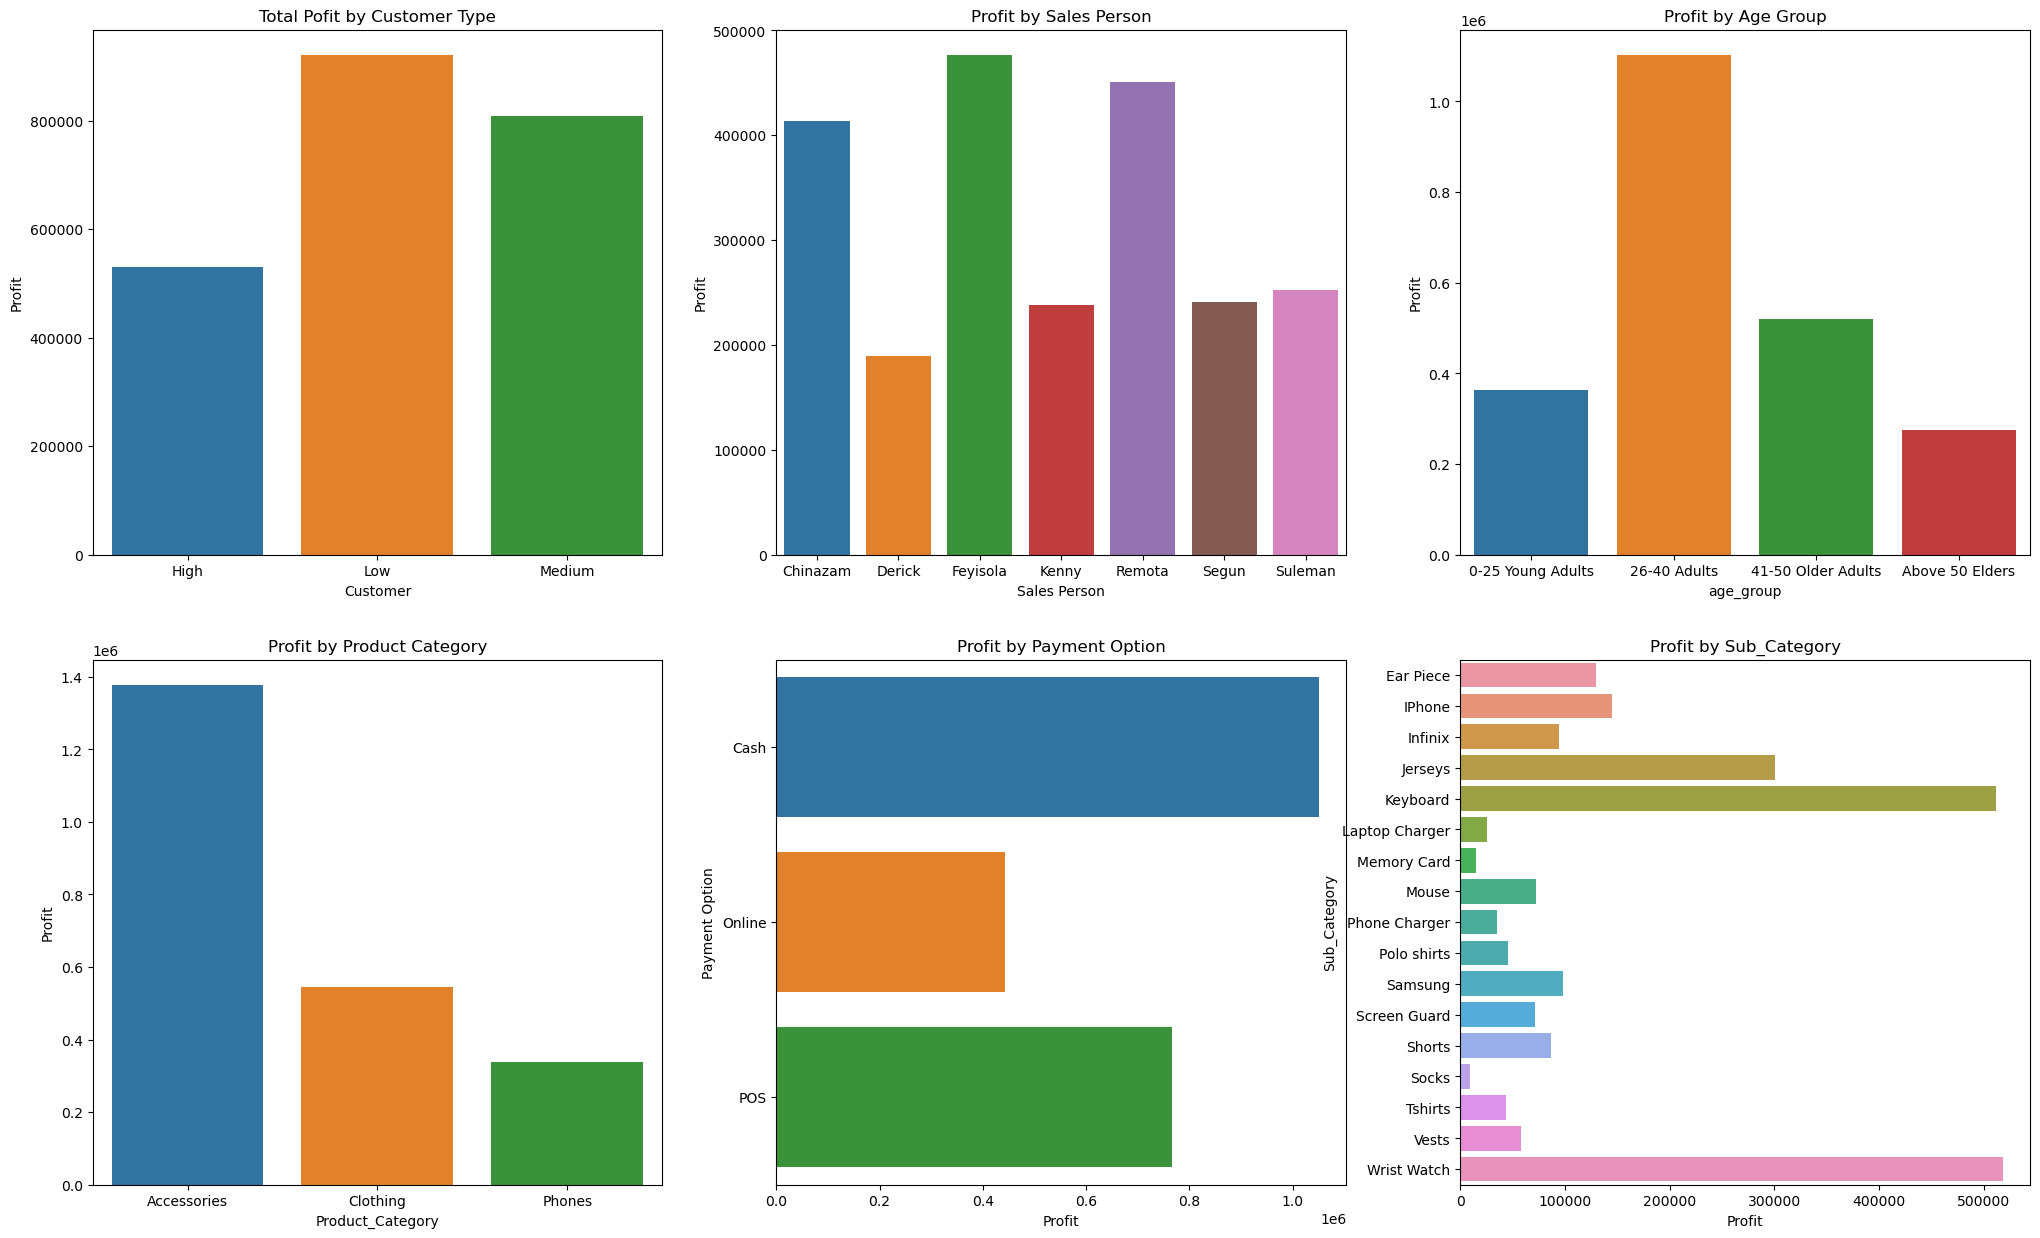

In [41]:
#For Categorical Columns

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
sns.barplot(x="Customer", data=cust_prof, y="Profit", ax=axs[0,0])
axs[0,0].set_title("Total Pofit by Customer Type")

salesperson_profit = df.groupby("Sales Person")["Profit"].sum().reset_index()
sns.barplot(x = "Sales Person", data=salesperson_profit, y="Profit", ax=axs[0,1])
axs[0,1].set_title("Profit by Sales Person")

agegroup_profit = df.groupby("age_group")["Profit"].sum().reset_index()
sns.barplot(x="age_group", data = agegroup_profit, y="Profit", ax=axs[0,2])
axs[0,2].set_title("Profit by Age Group")

prdcat_profit = df.groupby("Product_Category")["Profit"].sum().reset_index()
sns.barplot(x="Product_Category", data =prdcat_profit, y = "Profit", ax=axs[1,0] )
axs[1,0].set_title("Profit by Product Category")

pymnt_profit = df.groupby("Payment Option")["Profit"].sum().reset_index()
sns.barplot(y="Payment Option", data =pymnt_profit, x= "Profit", ax=axs[1,1])
axs[1,1].set_title("Profit by Payment Option")

profit_subcat = df.groupby("Sub_Category")["Profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=profit_subcat, x="Profit", ax=axs[1,2])
axs[1,2].set_title("Profit by Sub_Category")
;

#The chart below shows the relationship between profit and some of the categorical columns - Feyisola made the highest profit, 
# low customer type made the most profit along side keyboards and wristwatch sub categories.

In [39]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'Month_name',
       'Quarter', 'Day', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_Label'],
      dtype='object')

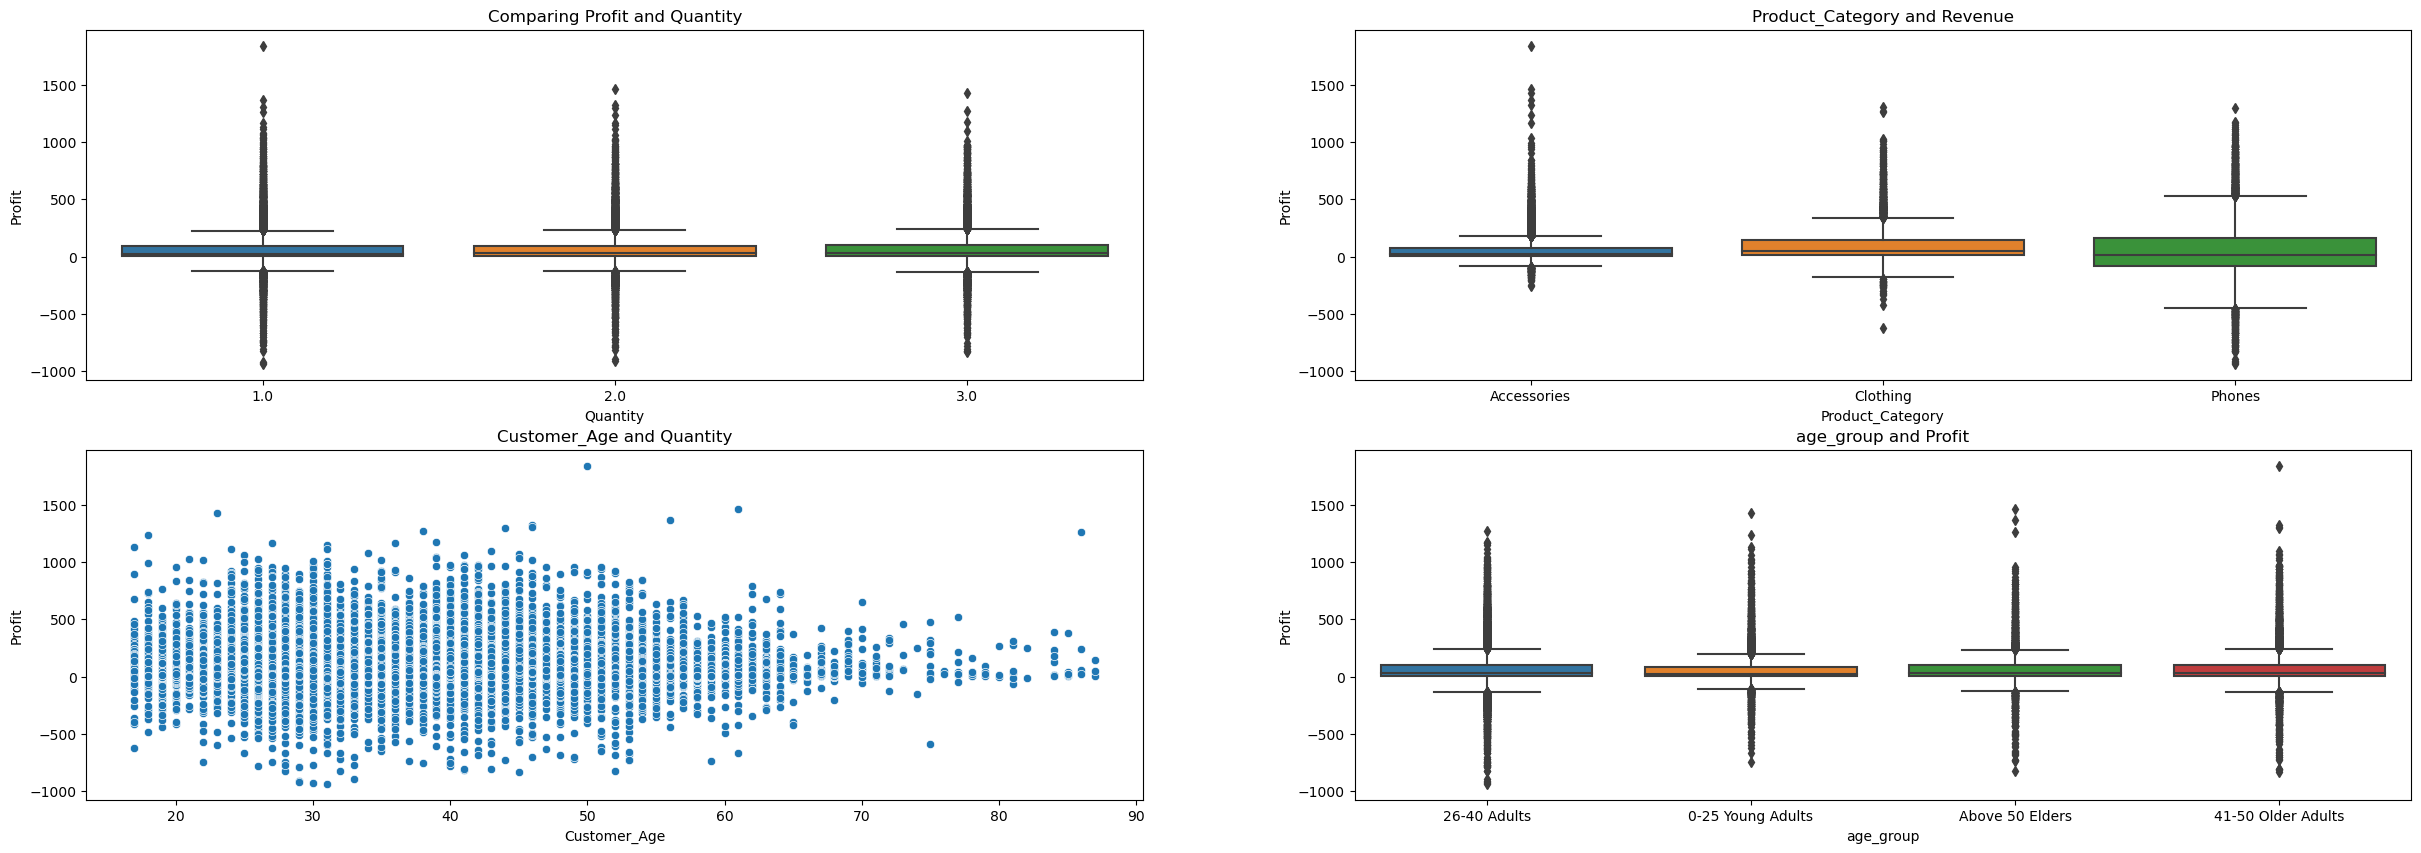

In [51]:
# Exploring the numerical coumns

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(30,10))
sns.boxplot(x="Quantity", data=df, y="Profit", ax=axs[0,0])
axs[0,0].set_title("Comparing Profit and Quantity")

sns.scatterplot(x="Customer_Age", data=df, y="Profit", ax=axs[1,0])
axs[1,0].set_title("Customer_Age and Quantity")

sns.boxplot(x="Product_Category", data=df, y="Profit", ax=axs[0,1])
axs[0,1].set_title("Product_Category and Revenue")

sns.boxplot(x="age_group", data=df, y="Profit", ax=axs[1,1])
axs[1,1].set_title("age_group and Profit");

# There's no significant trend between profit and quantity levels, Scatterplot shows that profit does not correlate 
# strongly with customer age, phones appears to have higher variability in profit, with more positive outliers, 
# while Accessories and Clothing show more consistent profit ranges but with lower peaks.
# Profits are evenly distributed across age groups, but older adults (41–50) and younger adults (18–25) exhibit slightly 
# higher positive outliers compared to others

In [56]:
df["Product_Category"].value_counts()

Product_Category
Accessories    22534
Phones          7093
Clothing        5239
Name: count, dtype: int64